In [65]:
from sklearn.ensemble import GradientBoostingRegressor     
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
from sklearn import metrics

warnings.filterwarnings("ignore")

### Data Prepration

In [66]:
df = load_boston()
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [67]:
x = pd.DataFrame(df.data, columns = df['feature_names'])
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [68]:
df.target[0:10]

# these are the median vlues, this is what we are intending to predict 

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [69]:
y = pd.Series(df['target'])
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

#Data Definition
#CRIM: Per capita crime rate by town
#ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
#INDUS: Proportion of non-retail business acres per town
#CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX: Nitric oxide concentration (parts per 10 million)
#RM: Average number of rooms per dwelling
#AGE: Proportion of owner-occupied units built prior to 1940
#DIS: Weighted distances to five Boston employment centers
#RAD: Index of accessibility to radial highways

#TAX: Full-value property tax rate per $10,000

#PTRATIO: Pupil-teacher ratio by town
#B:  proportion of people of African American descent by town
#LSTAT: Percentage of lower status of the population
#MEDV: Median value of owner-occupied homes in $1000s

here Y value is 
#MEDV: Median value of owner-occupied homes in $1000s

#### Model Training & Evaluation 

In [70]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # 80% training and 20% test

In [71]:
# create gradientboosting regressor 
# n_estimators: Number of weak learners to train iteratively.
# learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

gradientRegressor = GradientBoostingRegressor(max_depth = 2, n_estimators =3, learning_rate =1.0)

In [72]:
model = gradientRegressor.fit(x, y)

# predict
y_pred = model.predict(x_test)
y_pred[0:12]

array([22.98829471, 22.98829471,  8.83206145, 14.59449079, 14.59449079,
       22.98829471, 14.59449079, 35.60451767, 22.98829471, 31.75153427,
       14.59449079, 22.98829471])

In [73]:
print('Accuracy:', r2_score(y_test,y_pred))

Accuracy: 0.7997298345709012


In [78]:
print('Score, Training: ', gradientRegressor.score(x_train , y_train)) #accuracy score on training data
print('Score, Testing: ', gradientRegressor.score(x_test,y_test))

Score, Training:  0.8295722351448942
Score, Testing:  0.7997298345709012


In [74]:
import matplotlib.pyplot as plt

# model.feature_importances_ says that which of these features is more importtant to us 
feature_importance = 10.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) 

print('feature_importance:', feature_importance)
print('sorted_idx:', sorted_idx)
print('pos:', pos)



feature_importance: [ 0.48155325  0.          0.          0.          0.         10.
  0.          0.42158197  0.52542169  0.          0.          0.
  3.69374395]
sorted_idx: [ 1  2  3  4  6  9 10 11  7  0  8 12  5]
pos: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


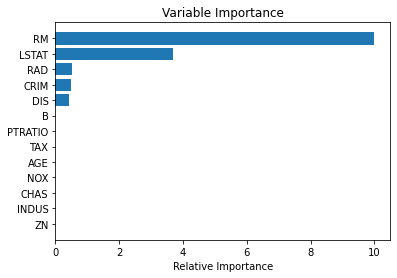

In [75]:

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Tuning Hyper parameters 

In [76]:
from sklearn.model_selection import GridSearchCV
LR = {'learning_rate':[0.15,0.1,0.10,0.05], 'n_estimators':[100,150,200,250]}

# The tuning runs all the estimators & learning rates one by one iteratively 
tuning = GridSearchCV(estimator =GradientBoostingRegressor(), 
            param_grid = LR, scoring='r2')

tuning.fit(x_train,y_train)
print(tuning.best_params_, tuning.best_score_)

{'learning_rate': 0.15, 'n_estimators': 200} 0.8847981110448708


### Pros:
 
It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. 

Gives better accuracy in most of the cases

### Cons:
Space and time complexity

Hyperparameter tuning